In [208]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,cross_val_predict,cross_validate
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn import impute
import time as tm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.filterwarnings("ignore")

## Reading in Data 
(After Imputing Missing Values using KNN)

In [43]:
# reading in train data (10000 observations)
train = pd.read_csv('train_clean.csv')
train = train.drop(['Unnamed: 0'],axis=1)
train.head(3)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.039852,0.000630,...,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0.0
1,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.039852,0.002526,...,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0.0
2,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,0.039852,0.007605,...,0.005497,0.009227,0.009123,0.003269,0.007329,0.000427,0.003429,0.006986,0.002603,0.0


In [44]:
train.shape

(10000, 164)

In [45]:
y_train = train['target']
X_train = train.drop('target',axis =1)

In [46]:
test = pd.read_csv('test_clean.csv')
test = test.drop(['Unnamed: 0'],axis=1)
test.head(3)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0.910519,0.003323,0.002007,0.813010,0.000483,0.164135,0.008578,0.005668,0.015702,0.002834,...,0.001487,0.008845,0.003424,0.005055,0.003387,0.006381,0.009071,0.000452,0.009093,0.0
1,0.916596,0.002949,0.007152,0.810892,0.007676,0.164135,0.004424,0.007180,0.015702,0.002115,...,0.000661,0.001575,0.004340,0.009045,0.005062,0.008398,0.009962,0.009318,0.003389,0.0
2,0.913374,0.000478,0.002182,0.815958,0.000189,0.164135,0.003844,0.006892,0.015702,0.005679,...,0.007952,0.001629,0.006936,0.002448,0.006637,0.002498,0.002704,0.009881,0.006629,0.0


In [47]:
test.shape

(10000, 164)

In [48]:
y_test = test['target']
X_test = test.drop('target',axis =1)

#### Proportion of 0 and 1s

In [49]:
#Proportion of 0s and 1s in train data
y_train.value_counts()/y_train.shape

0.0    0.7447
1.0    0.2553
Name: target, dtype: float64

In [50]:
#Proportion of 0s and 1s in test data
y_test.value_counts()/y_test.shape

0.0    0.7158
1.0    0.2842
Name: target, dtype: float64

#### Veryfing No Missing Values

In [51]:
missing_values = test.isnull().sum().sum()
missing_values

0

In [52]:
missing_values2 = train.isnull().sum().sum()
missing_values2

0

## XG Boost 

In [ ]:
start_time = tm.time()

param_dist = {'max_depth': [5, 7, 9], 
            'n_estimators': [400, 500, 600], #hudreds
            'learning_rate': [0.001, 0.01, 0.1, 1], 
            'reg_lambda': [0, 1, 5, 10],
            'gamma': [0, 10],
             'subsample':[0.5, 0.75, 1]}

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

xgb_model = xgb.XGBClassifier(random_state = 1, n_jobs=-1)

model = RandomizedSearchCV(xgb_model, param_distributions=param_dist, verbose=1,
                                n_iter=10, scoring = ['accuracy','recall'], refit = 'recall',
                                 n_jobs=-1, cv=cv, random_state=1).fit(X_train, y_train)

print('Train accuracy : %.3f'%model.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%model.best_estimator_.score(X_test, y_test))
print('Best accuracy Through Grid Search : %.3f'%model.best_score_)
print('Best params for recall')
print(model.best_params_)

print("Time taken =", round((tm.time() - start_time)), "seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from p

## Ridge Regression 

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 

#### Scaling Train Data

In [146]:
#Filtering all predictors
X = X_train

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

#### Tuning parameter lamda

In [147]:
#The tuning parameter lambda is referred as alpha in sklearn

#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,200)*0.5

In [148]:
#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y_train)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'Standardized coefficient')

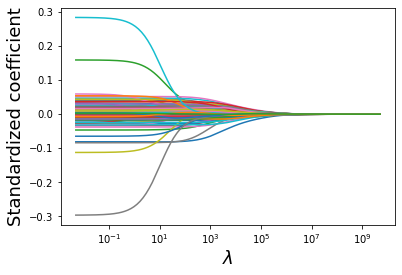

In [149]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.legend(train.columns);

In [150]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum

### CHANGE SHOULD REDUCE THE VALUE OF LAMDA!!!!! AFTER LOOKING AT GRAPH 
alphas = 10**np.linspace(1.5,-4,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y_train)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

7.367356964499727

Text(0, 0.5, 'Cross-validation error')

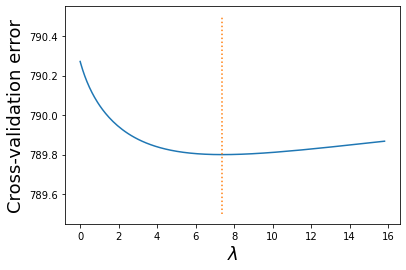

In [151]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[789.5,790.5],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

#### Scaling Test Data

In [152]:
#Filtering all predictors
X2 = X_test

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X2)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xtest_std = scaler.transform(X2)

#### Predicting on Test Data

In [159]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge = ridge.fit(Xstd, y_test)
pred=ridge.predict(Xtest_std)
ridge_coeff = pd.DataFrame(ridge.coef_, columns = ['coefficients'])
ridge_coeff['predictors'] = X.columns
ridge_coeff

,coefficients,predictors
0,-0.025391,P_2
1,-0.005989,D_39
2,0.121780,B_1
3,-0.006624,B_2
4,0.012172,R_1
...,...,...
158,0.005149,D_140
159,-0.109927,D_141
160,0.090687,D_143
161,0.008862,D_144


#### Test/Train results

In [160]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 71.6%
Precision = 38.7%
TPR or Recall = 21.4%
FNR = 78.6%
FPR = 11.4%
ROC-AUC = 52.5%


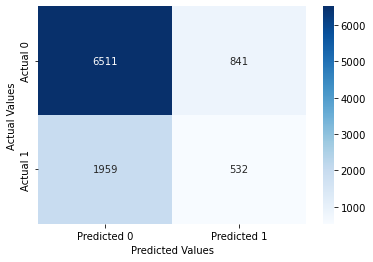

In [161]:
confusion_matrix_data(Xstd, y_train, ridge, cutoff = 0.4)

Classification accuracy = 69.4%
Precision = 42.3%
TPR or Recall = 21.5%
FNR = 78.5%
FPR = 11.6%
ROC-AUC = 53.4%


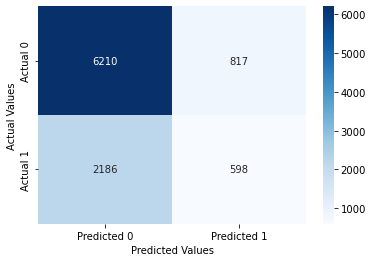

In [162]:
confusion_matrix_data(Xtest_std, y_test, ridge, cutoff = 0.4)

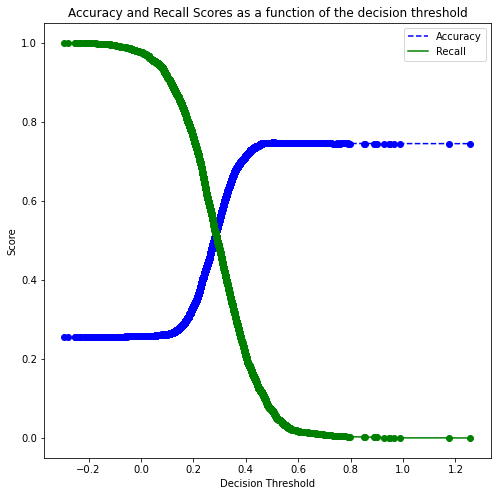

In [163]:
p, r, thresholds = precision_recall_curve(y_train, ridge.predict(Xstd))

accuracy_scores = []

for thresh in thresholds:
    y_pred = ridge.predict(Xstd) > thresh
    y_pred = y_pred.astype(int)
    
    accuracy = accuracy_score(y_pred, y_train)
    accuracy_scores.append(accuracy)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Accuracy and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, accuracy_scores, "b--", label="Accuracy")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, accuracy_scores, "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [164]:
# Thresholds with precision and recall
accuracies = np.array(accuracy_scores) 
concat_array = np.concatenate([thresholds.reshape(-1,1), accuracies.reshape(-1,1), r[:-1].reshape(-1,1)], axis = 1)
thresh_scores = pd.DataFrame(data = concat_array, columns = ['thresh', 'accuracy', 'recall'] )

#thresh_scores = thresh_scores[thresh_scores['recall']> 0.7]
#thresh_scores = thresh_scores[thresh_scores['accuracy']> 0.7]
thresh_scores = thresh_scores[thresh_scores['thresh']> 0.2]
thresh_scores = thresh_scores[thresh_scores['thresh']<.4]
thresh_scores

,thresh,accuracy,recall
2006,0.200028,0.3333,0.759890
2007,0.200050,0.3332,0.759499
2008,0.200080,0.3333,0.759107
2009,0.200083,0.3334,0.759107
2010,0.200105,0.3335,0.759107
...,...,...,...
8619,0.399831,0.7138,0.209557
8620,0.399835,0.7139,0.209557
8621,0.399870,0.7138,0.209557
8622,0.399893,0.7139,0.209166


## Lasso Regression 

#### Tuning parameter

In [168]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [169]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y_train)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'Standardized coefficient')

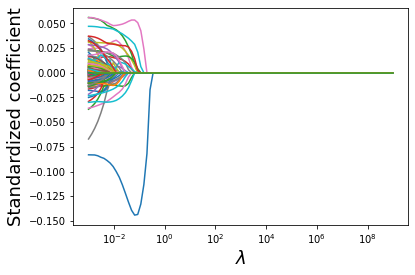

In [170]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.legend(train.columns[1:6]);

In [173]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y_train)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.013063376127816646

Text(0, 0.5, 'Cross-validation error')

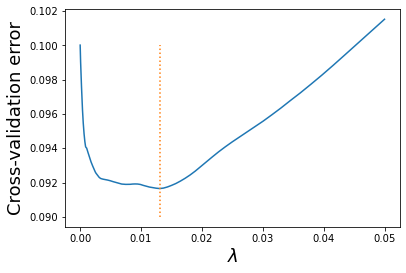

In [174]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.09,0.10],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

#### Predicting on Test Data

In [175]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso = lasso.fit(Xstd, y_test)

#### Test/Train results

Classification accuracy = 74.4%
Precision = 36.0%
TPR or Recall = 0.4%
FNR = 99.6%
FPR = 0.2%
ROC-AUC = 60.5%


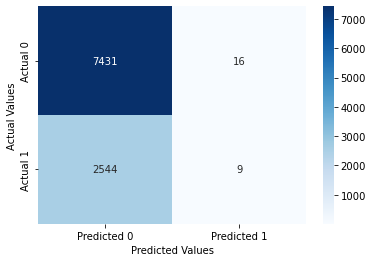

In [184]:
confusion_matrix_data(Xstd, y_train, lasso, cutoff = 0.4)

Classification accuracy = 71.6%
Precision = 63.6%
TPR or Recall = 0.2%
FNR = 99.8%
FPR = 0.1%
ROC-AUC = 60.0%


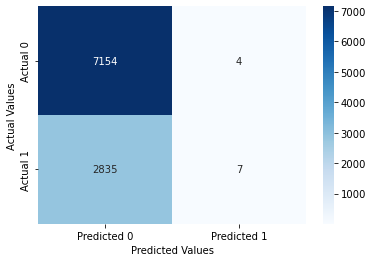

In [185]:
confusion_matrix_data(Xtest_std, y_test, lasso, cutoff = 0.4)

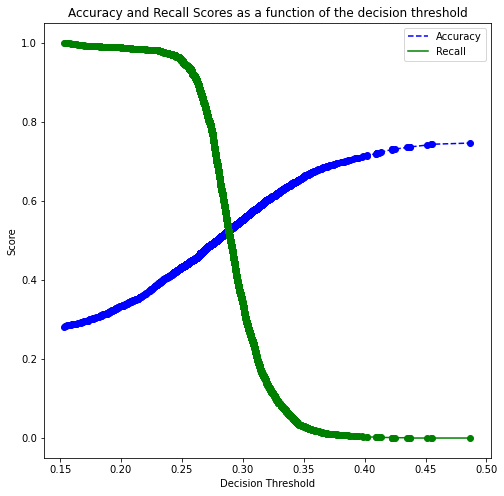

In [176]:
p, r, thresholds = precision_recall_curve(y_train, lasso.predict(Xstd))

accuracy_scores = []

for thresh in thresholds:
    y_pred = ridge.predict(Xstd) > thresh
    y_pred = y_pred.astype(int)
    
    accuracy = accuracy_score(y_pred, y_train)
    accuracy_scores.append(accuracy)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Accuracy and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, accuracy_scores, "b--", label="Accuracy")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, accuracy_scores, "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [144]:
# Thresholds with precision and recall
accuracies = np.array(accuracy_scores) 
concat_array = np.concatenate([thresholds.reshape(-1,1), accuracies.reshape(-1,1), r[:-1].reshape(-1,1)], axis = 1)
thresh_scores = pd.DataFrame(data = concat_array, columns = ['thresh', 'accuracy', 'recall'] )

# Filter recall values over 60%
#thresh_scores = thresh_scores[thresh_scores['recall']> 0.7]
#thresh_scores = thresh_scores[thresh_scores['accuracy']> 0.7]
thresh_scores = thresh_scores[thresh_scores['thresh']> 0.2]
thresh_scores = thresh_scores[thresh_scores['thresh']<.4]
thresh_scores

,thresh,accuracy,recall
157,0.200033,0.3333,0.987857
158,0.200055,0.3332,0.987857
159,0.200127,0.3335,0.987466
160,0.200948,0.3345,0.987466
161,0.201064,0.3348,0.987074
...,...,...,...
9957,0.394341,0.7087,0.005484
9958,0.394404,0.7089,0.005092
9959,0.394547,0.7088,0.004700
9960,0.397602,0.7112,0.004309


## Stepwise Variable Selection

In [209]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [226]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    print(predictor_subset)
    model = sm.logit('target~' + '+'.join(predictor_subset), data = train).fit()
    BIC = model.bic
    return {"model":model, "BIC":BIC}

### Forward Stepwise Selection

In [227]:
#Creating a dataframe with all the predictors
X = X_train
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = X_train

In [228]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = tm.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = tm.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [229]:
def forward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"])

    tic = tm.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = tm.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [230]:
models_best = forward_selection()

['P_2']
Optimization terminated successfully.
         Current function value: 0.330268
         Iterations 7
['D_39']
Optimization terminated successfully.
         Current function value: 0.551522
         Iterations 5
['B_1']
Optimization terminated successfully.
         Current function value: 0.503960
         Iterations 6
['B_2']
Optimization terminated successfully.
         Current function value: 0.465167
         Iterations 6
['R_1']
Optimization terminated successfully.
         Current function value: 0.502821
         Iterations 6
['S_3']
Optimization terminated successfully.
         Current function value: 0.526987
         Iterations 6
['D_41']
Optimization terminated successfully.
         Current function value: 0.518310
         Iterations 6
['B_3']
Optimization terminated successfully.
         Current function value: 0.494567
         Iterations 6
['D_43']
Optimization terminated successfully.
         Current function value: 0.509454
         Iterations 6
['D_44'

['R_8']
Optimization terminated successfully.
         Current function value: 0.549168
         Iterations 7
['S_16']
Optimization terminated successfully.
         Current function value: 0.566675
         Iterations 5
['D_80']
Optimization terminated successfully.
         Current function value: 0.564921
         Iterations 5
['R_10']
Optimization terminated successfully.
         Current function value: 0.542181
         Iterations 6
['R_11']
Optimization terminated successfully.
         Current function value: 0.563238
         Iterations 5
['B_27']
Optimization terminated successfully.
         Current function value: 0.568072
         Iterations 5
['D_81']
Optimization terminated successfully.
         Current function value: 0.539641
         Iterations 7
['D_82']
Optimization terminated successfully.
         Current function value: 0.562062
         Iterations 5
['S_17']
Optimization terminated successfully.
         Current function value: 0.567948
         Iterations 5
['

Optimization terminated successfully.
         Current function value: 0.550766
         Iterations 5
['D_131']
Optimization terminated successfully.
         Current function value: 0.548312
         Iterations 5
['D_133']
Optimization terminated successfully.
         Current function value: 0.561694
         Iterations 5
['R_28']
Optimization terminated successfully.
         Current function value: 0.567504
         Iterations 7
['D_139']
Optimization terminated successfully.
         Current function value: 0.555418
         Iterations 5
['D_140']
Optimization terminated successfully.
         Current function value: 0.562058
         Iterations 5
['D_141']
Optimization terminated successfully.
         Current function value: 0.555414
         Iterations 5
['D_143']
Optimization terminated successfully.
         Current function value: 0.555298
         Iterations 5
['D_144']
Optimization terminated successfully.
         Current function value: 0.568040
         Iterations 5
['D

Optimization terminated successfully.
         Current function value: 0.322840
         Iterations 7
['P_2', 'D_70']
Optimization terminated successfully.
         Current function value: 0.322977
         Iterations 7
['P_2', 'D_71']
Optimization terminated successfully.
         Current function value: 0.327736
         Iterations 8
['P_2', 'D_72']
Optimization terminated successfully.
         Current function value: 0.329503
         Iterations 7
['P_2', 'S_15']
Optimization terminated successfully.
         Current function value: 0.328191
         Iterations 7
['P_2', 'B_23']
Optimization terminated successfully.
         Current function value: 0.317015
         Iterations 7
['P_2', 'P_4']
Optimization terminated successfully.
         Current function value: 0.328226
         Iterations 7
['P_2', 'D_74']
Optimization terminated successfully.
         Current function value: 0.318225
         Iterations 7
['P_2', 'D_75']
Optimization terminated successfully.
         Current fu

['P_2', 'D_112']
Optimization terminated successfully.
         Current function value: 0.328046
         Iterations 7
['P_2', 'B_40']
Optimization terminated successfully.
         Current function value: 0.323934
         Iterations 7
['P_2', 'S_27']
Optimization terminated successfully.
         Current function value: 0.330051
         Iterations 7
['P_2', 'D_113']
Optimization terminated successfully.
         Current function value: 0.328553
         Iterations 7
['P_2', 'D_114']
Optimization terminated successfully.
         Current function value: 0.328626
         Iterations 7
['P_2', 'D_115']
Optimization terminated successfully.
         Current function value: 0.330066
         Iterations 7
['P_2', 'D_116']
         Current function value: 0.329665
         Iterations: 35
['P_2', 'D_117']
Optimization terminated successfully.
         Current function value: 0.325632
         Iterations 7
['P_2', 'D_118']
Optimization terminated successfully.
         Current function value

['P_2', 'D_77', 'D_61']
Optimization terminated successfully.
         Current function value: 0.300302
         Iterations 8
['P_2', 'D_77', 'B_15']
Optimization terminated successfully.
         Current function value: 0.308969
         Iterations 8
['P_2', 'D_77', 'S_11']
Optimization terminated successfully.
         Current function value: 0.308721
         Iterations 8
['P_2', 'D_77', 'D_62']
Optimization terminated successfully.
         Current function value: 0.307200
         Iterations 8
['P_2', 'D_77', 'D_65']
Optimization terminated successfully.
         Current function value: 0.306182
         Iterations 8
['P_2', 'D_77', 'B_16']
Optimization terminated successfully.
         Current function value: 0.307276
         Iterations 8
['P_2', 'D_77', 'B_17']
Optimization terminated successfully.
         Current function value: 0.304931
         Iterations 8
['P_2', 'D_77', 'B_18']
Optimization terminated successfully.
         Current function value: 0.296835
         Itera

Optimization terminated successfully.
         Current function value: 0.309156
         Iterations 12
['P_2', 'D_77', 'D_94']
Optimization terminated successfully.
         Current function value: 0.309033
         Iterations 8
['P_2', 'D_77', 'R_24']
Optimization terminated successfully.
         Current function value: 0.309525
         Iterations 8
['P_2', 'D_77', 'R_25']
Optimization terminated successfully.
         Current function value: 0.308609
         Iterations 8
['P_2', 'D_77', 'D_96']
Optimization terminated successfully.
         Current function value: 0.309557
         Iterations 8
['P_2', 'D_77', 'S_22']
Optimization terminated successfully.
         Current function value: 0.309564
         Iterations 8
['P_2', 'D_77', 'S_23']
Optimization terminated successfully.
         Current function value: 0.309103
         Iterations 8
['P_2', 'D_77', 'S_24']
Optimization terminated successfully.
         Current function value: 0.309565
         Iterations 8
['P_2', 'D_77',

Optimization terminated successfully.
         Current function value: 0.291756
         Iterations 8
['P_2', 'D_77', 'B_11', 'B_7']
Optimization terminated successfully.
         Current function value: 0.293583
         Iterations 8
['P_2', 'D_77', 'B_11', 'B_8']
Optimization terminated successfully.
         Current function value: 0.292470
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_50']
Optimization terminated successfully.
         Current function value: 0.288708
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_51']
Optimization terminated successfully.
         Current function value: 0.293529
         Iterations 8
['P_2', 'D_77', 'B_11', 'B_9']
Optimization terminated successfully.
         Current function value: 0.294178
         Iterations 8
['P_2', 'D_77', 'B_11', 'R_3']
Optimization terminated successfully.
         Current function value: 0.283374
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_52']
Optimization terminated successfully.
         Current function va

Optimization terminated successfully.
         Current function value: 0.290722
         Iterations 8
['P_2', 'D_77', 'B_11', 'B_28']
Optimization terminated successfully.
         Current function value: 0.293290
         Iterations 8
['P_2', 'D_77', 'B_11', 'R_13']
Optimization terminated successfully.
         Current function value: 0.294525
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_83']
Optimization terminated successfully.
         Current function value: 0.294552
         Iterations 8
['P_2', 'D_77', 'B_11', 'R_14']
Optimization terminated successfully.
         Current function value: 0.294504
         Iterations 9
['P_2', 'D_77', 'B_11', 'R_15']
Optimization terminated successfully.
         Current function value: 0.294551
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_84']
Optimization terminated successfully.
         Current function value: 0.294391
         Iterations 8
['P_2', 'D_77', 'B_11', 'R_16']
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.291929
         Iterations 11
['P_2', 'D_77', 'B_11', 'D_128']
Optimization terminated successfully.
         Current function value: 0.294079
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_129']
Optimization terminated successfully.
         Current function value: 0.294043
         Iterations 8
['P_2', 'D_77', 'B_11', 'B_41']
Optimization terminated successfully.
         Current function value: 0.294550
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_130']
Optimization terminated successfully.
         Current function value: 0.293739
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_131']
Optimization terminated successfully.
         Current function value: 0.292938
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_133']
Optimization terminated successfully.
         Current function value: 0.293945
         Iterations 8
['P_2', 'D_77', 'B_11', 'R_28']
Optimization terminated successfully.
         Current f

Optimization terminated successfully.
         Current function value: 0.279140
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'B_16']
Optimization terminated successfully.
         Current function value: 0.281928
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'B_17']
Optimization terminated successfully.
         Current function value: 0.281544
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'B_18']
Optimization terminated successfully.
         Current function value: 0.278486
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'B_19']
Optimization terminated successfully.
         Current function value: 0.281360
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'B_20']
Optimization terminated successfully.
         Current function value: 0.281808
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_68']
Optimization terminated successfully.
         Current function value: 0.281854
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'S_12']
Optimi

Optimization terminated successfully.
         Current function value: 0.281265
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_96']
Optimization terminated successfully.
         Current function value: 0.281980
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'S_22']
Optimization terminated successfully.
         Current function value: 0.282005
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'S_23']
Optimization terminated successfully.
         Current function value: 0.281989
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'S_24']
Optimization terminated successfully.
         Current function value: 0.282009
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'S_25']
Optimization terminated successfully.
         Current function value: 0.281700
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'S_26']
Optimization terminated successfully.
         Current function value: 0.282031
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_102']
Optim

['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'B_6']
Optimization terminated successfully.
         Current function value: 0.271134
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'B_7']
Optimization terminated successfully.
         Current function value: 0.272553
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'B_8']
Optimization terminated successfully.
         Current function value: 0.272508
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50']
Optimization terminated successfully.
         Current function value: 0.268528
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_51']
Optimization terminated successfully.
         Current function value: 0.273065
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'B_9']
Optimization terminated successfully.
         Current function value: 0.273517
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'R_3']
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 0.274037
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_79']
Optimization terminated successfully.
         Current function value: 0.272730
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'R_8']
Optimization terminated successfully.
         Current function value: 0.273931
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'S_16']
Optimization terminated successfully.
         Current function value: 0.273489
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_80']
Optimization terminated successfully.
         Current function value: 0.273070
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'R_10']
Optimization terminated successfully.
         Current function value: 0.273820
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'R_11']
Optimization terminated successfully.
         Current function value: 0.273271
         Iterations 8

['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_112']
Optimization terminated successfully.
         Current function value: 0.273913
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'B_40']
Optimization terminated successfully.
         Current function value: 0.272458
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'S_27']
Optimization terminated successfully.
         Current function value: 0.274023
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_113']
Optimization terminated successfully.
         Current function value: 0.273424
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_114']
Optimization terminated successfully.
         Current function value: 0.273754
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_115']
Optimization terminated successfully.
         Current function value: 0.274028
         Iterations 8
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_116']
         Current function value: 0.273206
     

Optimization terminated successfully.
         Current function value: 0.268332
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_55']
Optimization terminated successfully.
         Current function value: 0.267265
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_56']
Optimization terminated successfully.
         Current function value: 0.266312
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'B_13']
Optimization terminated successfully.
         Current function value: 0.268497
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_5']
Optimization terminated successfully.
         Current function value: 0.268525
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_58']
Optimization terminated successfully.
         Current function value: 0.264890
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'S_9']
Optimization terminated successfully.
         Current

Optimization terminated successfully.
         Current function value: 0.268465
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_83']
Optimization terminated successfully.
         Current function value: 0.268445
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_14']
Optimization terminated successfully.
         Current function value: 0.268470
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_15']
Optimization terminated successfully.
         Current function value: 0.268528
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_84']
Optimization terminated successfully.
         Current function value: 0.268271
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_16']
Optimization terminated successfully.
         Current function value: 0.268476
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'B_30']
Optimization terminated successfully.
         Curre

Optimization terminated successfully.
         Current function value: 0.266828
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_123']
Optimization terminated successfully.
         Current function value: 0.268514
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_124']
Optimization terminated successfully.
         Current function value: 0.265476
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_125']
Optimization terminated successfully.
         Current function value: 0.268448
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_126']
Optimization terminated successfully.
         Current function value: 0.268336
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_127']
Optimization terminated successfully.
         Current function value: 0.266580
         Iterations 11
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'D_128']
Optimization terminated successfully.
       

Optimization terminated successfully.
         Current function value: 0.260841
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'S_9']
Optimization terminated successfully.
         Current function value: 0.263141
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'B_14']
Optimization terminated successfully.
         Current function value: 0.263481
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_59']
Optimization terminated successfully.
         Current function value: 0.262408
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_60']
Optimization terminated successfully.
         Current function value: 0.263236
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_61']
Optimization terminated successfully.
         Current function value: 0.261006
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'B_15']
Optim

Optimization terminated successfully.
         Current function value: 0.263775
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'S_18']
Optimization terminated successfully.
         Current function value: 0.263206
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_86']
Optimization terminated successfully.
         Current function value: 0.263757
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'R_17']
Optimization terminated successfully.
         Current function value: 0.263689
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'R_18']
Optimization terminated successfully.
         Current function value: 0.263756
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'B_31']
Optimization terminated successfully.
         Current function value: 0.263277
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'S_19']
Opti

Optimization terminated successfully.
         Current function value: 0.263357
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_129']
Optimization terminated successfully.
         Current function value: 0.262595
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'B_41']
Optimization terminated successfully.
         Current function value: 0.263678
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_130']
Optimization terminated successfully.
         Current function value: 0.263479
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_131']
Optimization terminated successfully.
         Current function value: 0.263214
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_133']
Optimization terminated successfully.
         Current function value: 0.263543
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'R_28']


Optimization terminated successfully.
         Current function value: 0.259065
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'D_59']
Optimization terminated successfully.
         Current function value: 0.257749
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'D_60']
Optimization terminated successfully.
         Current function value: 0.259121
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'D_61']
Optimization terminated successfully.
         Current function value: 0.259001
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'B_15']
Optimization terminated successfully.
         Current function value: 0.259077
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'S_11']
Optimization terminated successfully.
         Current function value: 0.257605
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_4

Optimization terminated successfully.
         Current function value: 0.258964
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'R_16']
Optimization terminated successfully.
         Current function value: 0.259096
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'B_30']
Optimization terminated successfully.
         Current function value: 0.259106
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'S_18']
Optimization terminated successfully.
         Current function value: 0.258759
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'D_86']
Optimization terminated successfully.
         Current function value: 0.259132
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'R_17']
Optimization terminated successfully.
         Current function value: 0.259064
         Iterations 9
['P_2', 'D_77', 'B_11', 'D_4

LinAlgError: Singular matrix

In [ ]:
best_sub_plots()

In [ ]:
best_subset_model = models_best.loc[4,'model']
models_best.loc[4,'model'].summary()

In [ ]:
confusion_matrix_data(X_train, y_train, best_forward_model, cutoff = 0.4)

In [ ]:
confusion_matrix_data(X_test, y_test, best_forward_model, cutoff = 0.4)

In [231]:
sub = X_train[['P_2', 'D_77', 'B_11', 'D_43', 'D_41', 'D_50', 'R_27', 'D_48', 'D_116']]

In [234]:
sub['D_116'].value_counts()

0.0    9992
1.0       8
Name: D_116, dtype: int64

float64    163
dtype: int64

### Backward Stepwise Selection

In [ ]:
#Creating a dataframe with all the predictors
X = X_train
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = X_train

In [ ]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
def backward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [ ]:
models_best = backward_selection()

In [ ]:
best_sub_plots()

In [ ]:
best_backward_model = models_best.loc[18,'model']
models_best.loc[18,'model'].summary()

In [ ]:
confusion_matrix_data(X_train, y_train, best_backward_model, cutoff = 0.4)

In [ ]:
confusion_matrix_data(X_test, y_test, best_backward_model, cutoff = 0.4)